# Data Prepocessing

### Load Dataset

In [1]:
from sklearn.datasets import load_boston  # Boston House Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
type(boston) 

sklearn.utils.Bunch

In [3]:
X = boston.data      # Features
Y = boston.target    # Actual Predictions

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [4]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
pd.DataFrame(Y).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
# What are all the features?

print(boston.feature_names) 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Have a deep dive in Boston Dataset

print(boston.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Dealing with DataFrame

In [8]:
# Create a DataFrame

df = pd.DataFrame(X) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# There is no columns/features name given to DataFrame. Doing it manually

df.columns = boston.feature_names # Features name 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


###  Features Normalization

In [11]:
# Taking mean/average and standard deviation

mean = np.average(X, axis = 0) # Axis needed because there are more than one column
std = np.std(X, axis = 0) 


In [12]:
X = (X - mean)/std # Normalized!!

# How it is looking?
pd.DataFrame(X, columns = boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# Linear Regression on Multiple Features

We will be doing calculations through loops rather than using vectorization as of now

In [13]:
X.shape, Y.shape

((506, 13), (506,))

A = \begin{bmatrix} 
     a_{00} & a_{01} & \dots & \dots & \dots & \dots & \dots & a_{0n}\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    a_{m0} & \dots & \dots & \dots & \dots & \dots & \dots & a_{mn} 
    \end{bmatrix}
    

In [14]:
# Adding one Column to Dataset := Bias Feature

Bias = np.ones((X.shape[0], 1))


A = \begin{bmatrix} 
    1 & a_{00} & a_{01} & \dots & \dots & \dots & \dots & \dots & a_{0n}\\
    1 & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    1 & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    1 & a_{m0} & \dots & \dots & \dots & \dots & \dots & \dots & a_{mn} 
    \end{bmatrix}
    

In [15]:
# Horizontal column stacked into X

X = np.hstack((Bias, X))
print(X[:4, :4])

[[ 1.         -0.41978194  0.28482986 -1.2879095 ]
 [ 1.         -0.41733926 -0.48772236 -0.59338101]
 [ 1.         -0.41734159 -0.48772236 -0.59338101]
 [ 1.         -0.41675042 -0.48772236 -1.30687771]]


# Hypothesis Function

$ h(\theta) = \theta_{0}X_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} +... + \theta_{n}X_{n} $

In [16]:
# x is any datarow out of whole Dataset

def Hypothesis(x, Theta):
    '''This function is to calculate hypothesis for a particular row'''
    
    Hypo = 0
    n = x.shape[0] # Number of features
    
    for j in range(0, n):
        Hypo += Theta[j] * x[j]
        
    return Hypo


## Error

$ Error = \frac{1}{m} \sum_{i=1}^{m}( h(\theta) - Y)^2$

$ Error = Cost Function = \frac{1}{m} \sum_{i=1}^{m}( h(\theta) - Y)^2 $

#### Note : 
$\frac{1}{2}$ is of no use as it can be manged by learning rate ie ...\
$\frac{1}{2}$ * learning_rate' = learning_rate (where learning_rate = $\frac{learning\_rate'}{2})$


In [17]:

def Error(X, Y, Theta):
    '''This function is to calculate mean error over whole DataSet for a particular set of theta'''
    
    error = 0
    m = X.shape[0] # Number of training example
    
    for i in range(m):
        
        y_predict = Hypothesis(X[i], Theta) # Hypothesis of ith row
        
        error += (y_predict - Y[i])**2  # Summing up error 
        
    return error/m # Mean Error of whole dataset


## Gradient

$ Cost Function = J(\theta_{0}, \theta_{1},... \theta_{n}) = \frac{1}{2m} \sum_{i=1}^{m}( h(\theta) - Y)^2 $

$ Gradient = \frac{\partial J(\theta_{0}, \theta_{1}..., \theta_{n})}{\partial \theta(_j)} $

$ Gradient[0] = \frac{1}{m} \sum_{i=1}^{m}( h(\theta) - Y)$\
$ Gradient[1] = \frac{1}{m} \sum_{i=1}^{m}( h(\theta) - Y)X_{1}$\
$\vdots$\
$ Gradient[n] = \frac{1}{m} \sum_{i=1}^{m}( h(\theta) - Y)X_{n}$

In [18]:

def Gradient(X, Theta, Y):
    '''Gradient is to calculate derivative of cost function'''
    
    m, n = X.shape
    
    grad = np.zeros((n,)) # Gradient for each theta
    
    for j in range(n): # Considering a feature
        for i in range(m): # Now, going through whole dataset
            
            y_output = Hypothesis(X[i], Theta) # Prediction for each row in Dataset
            
            grad[j] += (y_output - Y[i])*X[i][j]
            
        
    return grad/m
    

## Gradient Descent

$\theta_{0} = \theta_{0} - \alpha \frac{\partial J(\theta_{0}, \theta_{1},..., \theta_{n})}{\partial \theta(_0)}$

$\theta_{1} = \theta_{1} - \alpha \frac{\partial J(\theta_{0}, \theta_{1},..., \theta_{n})}{\partial \theta(_1)}$\
$ \vdots$\
$ \vdots$\
$\theta_{n} = \theta_{n} - \alpha \frac{\partial J(\theta_{0}, \theta_{1},..., \theta_{n})}{\partial \theta(_n)}$




In [19]:

def GradientDescent(X, Y, LearningRate = 0.1, max_iter = 300):
    '''This function is to update Thetas accordingly'''
    
    m, n = X.shape
    
    theta = np.zeros((n, ))
    error_list = []
    
    for i in range(max_iter):
        
        error_list.append(Error(X, Y, theta)) # Error assicated with each theta
        
        grad = Gradient(X, theta, Y) # Gradient for a particular set of theta over all data
        
        for j in range(n): # Updating each theta inside looping
            theta[j] = theta[j] - grad[j] * LearningRate
            
            
    return error_list, theta
        

In [21]:
# Training Time
import time

start = time.time()
error_list, theta = GradientDescent(X, Y)
end = time.time()

print("Training Time : ", (end - start))

Training Time :  15.666477918624878


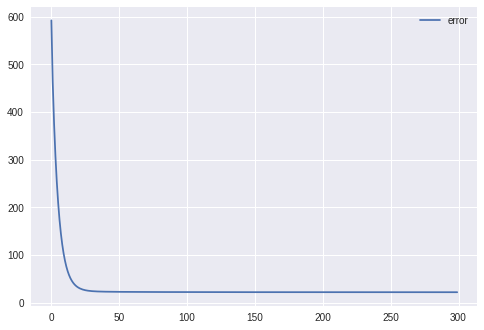

In [24]:
plt.style.use("seaborn")
plt.plot(error_list, label = "error")
plt.legend();

# Predictions

In [28]:
Y_prediction = []
m = X.shape[0]

for i in range(m):
    Y_prediction.append(Hypothesis(X[i], theta))

Y_prediction = np.array(Y_prediction)

# R$^{2}$ Score

$R^2 Score = 1 -  \sum_{i=1}^{m} \frac{(Y{^i} - Y\_predicted)^2}{(Y^i - \overline{Y})^2}$

In [29]:
def R2score(Y, Y_prediction):
    Numerator = np.sum((Y - Y_prediction) ** 2)
    Denominator = np.sum((Y - np.mean(Y_prediction)) ** 2)
    score = 1 - (Numerator/Denominator)
    return score    

In [30]:
R2score(Y, Y_prediction)

0.7404541323942742